In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
gender_submission = pd.read_csv(r'data/gender_submission.csv')
training_data = pd.read_csv(r'data/train.csv')
testing_data = pd.read_csv(r'data/test.csv')
training_data['train_test'] = 1
testing_data['train_test'] = 0
all_data = pd.concat([training_data,testing_data])

In [4]:
all_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


In [5]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  train_test   1309 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 143.2+ KB


In [6]:
training_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


In [7]:
numeric_cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
category_cols = ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

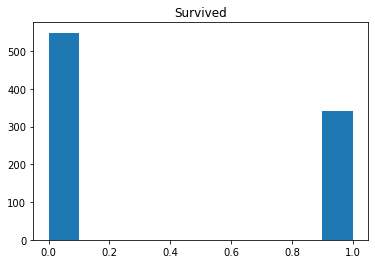

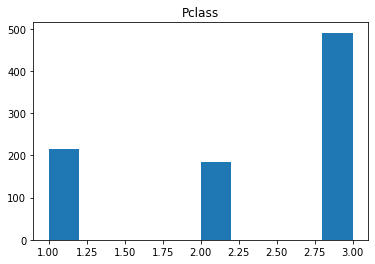

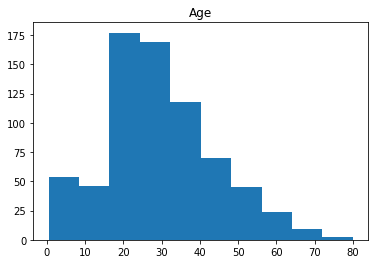

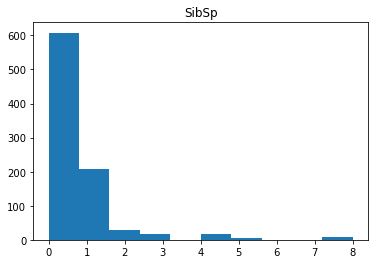

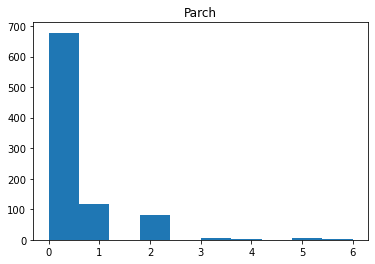

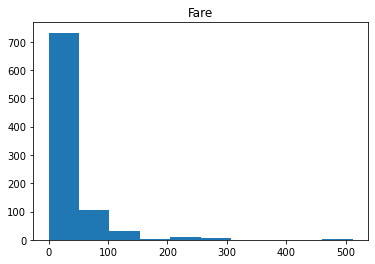

In [8]:
for col in numeric_cols:
    plt.hist(training_data[col])
    plt.title(col)
    plt.show()

In [9]:
# for col in category_cols:
#     sns.countplot(data=training_data, x=col) 
#     plt.show()

In [10]:
all_data = all_data.dropna(subset=['Embarked'])

In [11]:
age_median = training_data['Age'].median()
all_data.Age = all_data.Age.fillna(age_median)

/Users/chestergarettcalingacion/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [12]:
pd.pivot_table(training_data, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


In [13]:
all_data['Fare'] = all_data['Fare'].fillna(all_data['Fare'].median())

<ipython-input-13-da6c3b38bf6b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Fare'] = all_data['Fare'].fillna(all_data['Fare'].median())


In [14]:
all_data['Cabin'] = all_data['Cabin'].fillna('n')

<ipython-input-14-ab0a8015dbd3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Cabin'] = all_data['Cabin'].fillna('n')


In [15]:
all_data['norm_fare'] = np.log(all_data['Fare']+1)

<ipython-input-15-4ae4f620acf2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['norm_fare'] = np.log(all_data['Fare']+1)


In [16]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1307 entries, 0 to 417
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1307 non-null   int64  
 1   Survived     889 non-null    float64
 2   Pclass       1307 non-null   int64  
 3   Name         1307 non-null   object 
 4   Sex          1307 non-null   object 
 5   Age          1307 non-null   float64
 6   SibSp        1307 non-null   int64  
 7   Parch        1307 non-null   int64  
 8   Ticket       1307 non-null   object 
 9   Fare         1307 non-null   float64
 10  Cabin        1307 non-null   object 
 11  Embarked     1307 non-null   object 
 12  train_test   1307 non-null   int64  
 13  norm_fare    1307 non-null   float64
dtypes: float64(4), int64(5), object(5)
memory usage: 153.2+ KB


In [17]:
training_data['Cabin']= training_data['Cabin'].fillna('n')

### Preprocessing

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
#convert to dummy variables
all_dummies = pd.get_dummies(all_data[['Pclass','Age', 'SibSp', 'Parch', 'norm_fare', 'Embarked','train_test']])

In [20]:
X_train = all_dummies[all_dummies.train_test==1].drop(['train_test'], axis=1)
X_test = all_dummies[all_dummies.train_test==0].drop(['train_test'], axis=1)

In [21]:
#scale data
scale = StandardScaler()
all_dummies_scaled = all_dummies.copy()
all_dummies_scaled[['Age', 'SibSp', 'Parch', 'norm_fare']] = scale.fit_transform(all_dummies_scaled[['Age', 'SibSp', 'Parch', 'norm_fare']])

In [22]:
X_train_scaled = all_dummies_scaled[all_dummies_scaled.train_test==1].drop(['train_test'],axis=1)
X_test_scaled = all_dummies_scaled[all_dummies_scaled.train_test==0].drop(['train_test'],axis=1)
y_train = all_data[all_data.train_test==1].Survived
y_train.shape

(889,)

### Model Training

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
log_model = LogisticRegression(max_iter=2000)
log_model.fit(X_train_scaled,y_train)

LogisticRegression(max_iter=2000)

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled,y_train)

KNeighborsClassifier()

### Model Evaluation

In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix

In [33]:
cv = cross_val_score(log_model, X_train, y_train,cv=5)
print(cv)
print(cv.mean())

[0.61797753 0.70224719 0.73595506 0.74157303 0.72881356]
0.7053132736621596


In [30]:
cv = cross_val_score(knn_model, X_train, y_train, cv=5)
print(cv)
print(cv.mean())

[0.66292135 0.66292135 0.70224719 0.79213483 0.73446328]
0.7109375991874565
